

# Task :


# Given the abstract and title for a set of research articles, predict the topics for each article included in the test set.




## Steps:
1. Read the data from csv file.    
[Pandas](https://pandas.pydata.org/docs/user_guide/io.html)
2. Data Preparation
3. Extract the required information from the data frame.
4. Word Embedding.  
* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
5. PreProcessing Data
* [WordNetLemmatizer](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/)
6. Latent Dirichlet Allocation
* [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)



# Import Libraries

In [55]:
# pandas
import pandas as pd

# sklearn - count vectorizers
from sklearn.feature_extraction.text import CountVectorizer

# LDA
from sklearn.decomposition import LatentDirichletAllocation

# Numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# seaborn
import seaborn as sns

# nltk
import nltk



# step 1 : Read Data from csv file


[df.size, df.shape and df.ndim](https://www.geeksforgeeks.org/python-pandas-df-size-df-shape-and-df-ndim/)

[pandas.DataFrame.size](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html)

[pandas.DataFrame.shape](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html)

In [56]:
df_train = pd.read_csv("train.csv")
# print(df_train)

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [58]:
df_train.shape

(20972, 9)

In [59]:
df_train.size

188748

## Test data

In [60]:
df_test = pd.read_csv("test.csv")
# print(df_test)

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8989 entries, 0 to 8988
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        8989 non-null   int64 
 1   TITLE     8989 non-null   object
 2   ABSTRACT  8989 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.8+ KB


In [62]:
df_test.shape

(8989, 3)

In [63]:
df_test.size

26967

# Step 2: Data Preparation

# **df_train**


1.   ID
2.   Title
3.   Abstract
4.   Subject it may belong to :
        *   Computer Science
        *   Physics
        *   Maths
        *   Stats
        *   Quantitative Biology	
        *   Quantitative Finance





In [64]:
df_train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


# **df_test**

1.   ID
2.   Title
3.   Abstract



In [65]:
df_test.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


### select everything 

*   X = df_train.iloc[:]

### select everything from row 3 to end


*   x = df_train.iloc[3:]


[pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

### Check: 
* Total number of articles. 
* Total number of articles without label. 
* Total labels.

In [66]:
x = df_train.iloc[:,3:].sum()
rowsum = df_train.iloc[:,2:].sum(axis = 1)
no_of_label_count = 0

for sum in rowsum.items():
  if sum == 0:
    no_of_label_count += 1

print("Total number of articles = ",len(df_train))
print("Total number of articles without label = ",no_of_label_count)
print("total labels = ",x.sum())

Total number of articles =  20972
Total number of articles without label =  0
total labels =  26267


### Check for missing value

In [67]:
train_null = df_train.isnull().sum()
print("Number of missing value in train data: ",train_null)

test_null = df_test.isnull().sum()
print("Number of missing value in test data: ", test_null)


print("\n")
print("train null data: ",train_null.sum())
print("test null data: ",test_null.sum())

Number of missing value in train data:  ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64
Number of missing value in test data:  ID          0
TITLE       0
ABSTRACT    0
dtype: int64


train null data:  0
test null data:  0


In [68]:
# for every row select from column 3 to end
# X = df_train.iloc[:,3:]
# X

In [69]:
# X = df_train.iloc[:,3:].sum() # column wise sum
# X

# Plot a Graph to look at he distribution

*  [Plotting with categorical variables](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

*  [How to use Seaborn Data Visualization for Machine Learning](https://machinelearningmastery.com/seaborn-data-visualization-for-machine-learning/)


*  [matplotlib.patches.Rectangle
](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)

*  [seaborn](https://seaborn.pydata.org/tutorial.html)

*  [How can I display text over columns in a bar chart in matplotlib
](https://stackoverflow.com/questions/7423445/how-can-i-display-text-over-columns-in-a-bar-chart-in-matplotlib)

In [70]:
'''
x.index =  Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')


x.values = array([8594, 6013, 5618, 5206,  587,  249])


type(x.values) = numpy.

# create patch/rectangle for CS, Physics, Math, Stat, Quantitaive Bio, Quantitative Finacne
ax.patches = 
[<matplotlib.patches.Rectangle at 0x7f6b3bc080d0>,
 <matplotlib.patches.Rectangle at 0x7f6b3bbee110>,
 <matplotlib.patches.Rectangle at 0x7f6b3bbeec10>,
 <matplotlib.patches.Rectangle at 0x7f6b3bc08b50>,
 <matplotlib.patches.Rectangle at 0x7f6b3bb8f0d0>,
 <matplotlib.patches.Rectangle at 0x7f6b3bb8f510>]



rects = ax.patches
labels = x.values
for rect,label in zip(rects,labels):
  print(rect , label)


op:
Rectangle(xy=(-0.4, 0), width=0.8, height=8594, angle=0) 8594
Rectangle(xy=(0.6, 0), width=0.8, height=6013, angle=0) 6013
Rectangle(xy=(1.6, 0), width=0.8, height=5618, angle=0) 5618
Rectangle(xy=(2.6, 0), width=0.8, height=5206, angle=0) 5206
Rectangle(xy=(3.6, 0), width=0.8, height=587, angle=0) 587
Rectangle(xy=(4.6, 0), width=0.8, height=249, angle=0) 249

'''

"\nx.index =  Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',\n       'Quantitative Biology', 'Quantitative Finance'],\n      dtype='object')\n\n\nx.values = array([8594, 6013, 5618, 5206,  587,  249])\n\n\ntype(x.values) = numpy.\n\n# create patch/rectangle for CS, Physics, Math, Stat, Quantitaive Bio, Quantitative Finacne\nax.patches = \n[<matplotlib.patches.Rectangle at 0x7f6b3bc080d0>,\n <matplotlib.patches.Rectangle at 0x7f6b3bbee110>,\n <matplotlib.patches.Rectangle at 0x7f6b3bbeec10>,\n <matplotlib.patches.Rectangle at 0x7f6b3bc08b50>,\n <matplotlib.patches.Rectangle at 0x7f6b3bb8f0d0>,\n <matplotlib.patches.Rectangle at 0x7f6b3bb8f510>]\n\n\n\nrects = ax.patches\nlabels = x.values\nfor rect,label in zip(rects,labels):\n  print(rect , label)\n\n\nop:\nRectangle(xy=(-0.4, 0), width=0.8, height=8594, angle=0) 8594\nRectangle(xy=(0.6, 0), width=0.8, height=6013, angle=0) 6013\nRectangle(xy=(1.6, 0), width=0.8, height=5618, angle=0) 5618\nRectangle(xy=(2.6, 0), wi

##  display text over columns in a bar chart in matplotlib

In [71]:
def autolabel(rects,labels):
# attach some text labels
  for rect,label in zip(rects,labels):
      height = rect.get_height()
      plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, label,
              ha='center', va='bottom')
  return

In [72]:
def graph_viz(x,title,label):
  sns.set_theme(style="whitegrid")
  plt.figure(figsize=(12,12))
  ax = sns.barplot(x.index, x.values, alpha = 0.8) # adjust transparency (alpha) 
  plt.title(title,fontsize = 12)
  plt.ylabel(label,fontsize = 12)
  plt.xlabel('Label',fontsize=12)

  # Display count in each class over columns in a bar chart
  rects = ax.patches
  labels = x.values
  autolabel(rects,labels)

  plt.show()


# dataset is highly imbalanced

# Number of occurance of each document

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


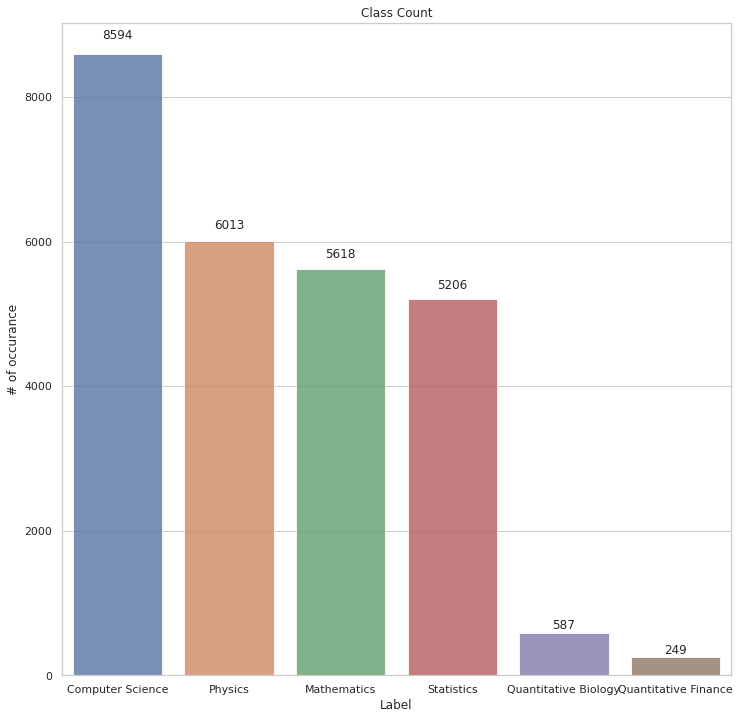

In [73]:
x = df_train.iloc[:,3:].sum()
graph_viz(x,title = 'Class Count',label='# of occurance')

# No of Multiple tags per article

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


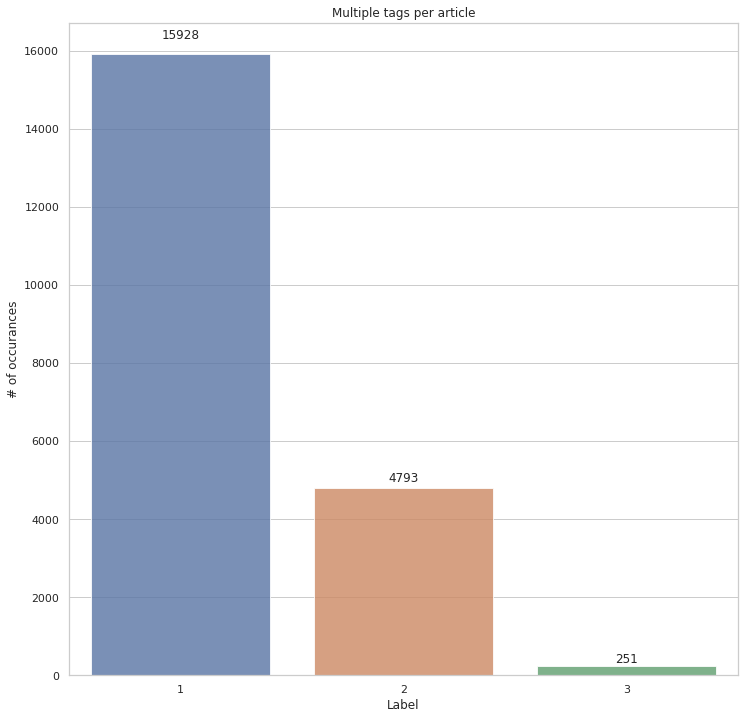

In [74]:
rowsum = df_train.iloc[:,2:].sum(axis = 1)
x = rowsum.value_counts() # Return a Series containing counts of unique values.
graph_viz(x,title = 'Multiple tags per article', label = '# of occurances')


# Step 3: Getting out only the abstract field

In [75]:
#df_test['ABSTRACT']

train_text = df_train['ABSTRACT']
print(train_text.head())
print('--------------------------')
test_text = df_test['ABSTRACT']
print(test_text.head())

0      Predictive models allow subject-specific inf...
1      Rotation invariance and translation invarian...
2      We introduce and develop the notion of spher...
3      The stochastic Landau--Lifshitz--Gilbert (LL...
4      Fourier-transform infra-red (FTIR) spectra o...
Name: ABSTRACT, dtype: object
--------------------------
0      We present novel understandings of the Gamma...
1      Meteorites contain minerals from Solar Syste...
2      Frame aggregation is a mechanism by which mu...
3      Milky Way open clusters are very diverse in ...
4      Proving that a cryptographic protocol is cor...
Name: ABSTRACT, dtype: object


In [76]:
# [df.value](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html)
test_text.values

array(['  We present novel understandings of the Gamma-Poisson (GaP) model, a\nprobabilistic matrix factorization model for count data. We show that GaP can\nbe rewritten free of the score/activation matrix. This gives us new insights\nabout the estimation of the topic/dictionary matrix by maximum marginal\nlikelihood estimation. In particular, this explains the robustness of this\nestimator to over-specified values of the factorization rank, especially its\nability to automatically prune irrelevant dictionary columns, as empirically\nobserved in previous work. The marginalization of the activation matrix leads\nin turn to a new Monte Carlo Expectation-Maximization algorithm with favorable\nproperties.\n',
       '  Meteorites contain minerals from Solar System asteroids with different\nproperties (like size, presence of water, core formation). We provide new\nmid-IR transmission spectra of powdered meteorites to obtain templates of how\nmid-IR spectra of asteroidal debris would look l

# Step 4:  Word Embedding

### **Function to get top n words**
[np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

[numpy.flip()](https://www.w3resource.com/numpy/manipulation/flip.php)

[numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

[numpy.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)

[numpy.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)

[pandas.DataFrame.values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html)

[pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

[Matplotlib.axes.Axes.bar()](https://www.geeksforgeeks.org/matplotlib-axes-axes-bar-in-python/)


[How vectorizer fit_transform work in sklearn](https://stackoverflow.com/questions/47898326/how-vectorizer-fit-transform-work-in-sklearn/54350840)


**Explanation to get the top n words from the test data:**
```
On test data perform vectorization by removing stop words (vectorization is converting text to numbers)

Then count the number of times each word has appeared(np.sum) since it is a vector. we count column wise. 

  a | b | c | d
0
1
2
3
------------------
sum 
--------------------

Capture the sum and index. Egsum value 4547 might be present at index 147.

sort (np.argsort) the index where the value are present and store them in descending order.
sort(np.sort) the sum in descending(np.flip) order and store.


now create a 2d matrix and fill it with zero

Now replace zero with 1 in the place(row, col).
column value is obtained from the index above.


once you replace the 0 with 1 convert the vector back into text

```

In [77]:
# def get_top_n_words(n_top_word ,test_data):
#   vectorizer = CountVectorizer(stop_words = 'english') #initialize the vectorizer to remove stop words
#   transformed_vectorizer = vectorizer.fit_transform(test_data)
#   # print(transformed_vectorizer)
#   # print('-------------------------------')
#   # print('\n')
#   print(vectorizer.get_feature_names())
#   # print('-------------------------------')
#   # print('\n')
#   print(transformed_vectorizer.toarray())

#   vectorized_total = np.sum(transformed_vectorizer, axis = 0) # column wise addition
#   print("Vectorized total is: ",vectorized_total)
#   # print(np.argsort(vectorized_total))
#   # print(np.argsort(vectorized_total)[0,:])
#   print(np.flip(np.argsort(vectorized_total)[0,:]))
#   # print(np.flip(np.argsort(vectorized_total)[0,:],1))
#   # print(np.flip(np.sort(vectorized_total)[0,:],1))
#   print(np.flip(np.sort(vectorized_total)[0,:]))
#   # print(vectorized_total.shape[1]) # column
#   # print(vectorized_total.shape)

#   word_indices = np.flip(np.argsort(vectorized_total)[0,:],1)
#   print("word index is : ",word_indices)
#   word_value = np.flip(np.sort(vectorized_total)[0,:],1)
#   # print("Word Value is = ",word_value)
#   print("Word Value is = ",word_value[0,:n_top_word].tolist()[0])
  
#   # create a 2d array with 15 row and column and fill them with zero

#   word_vector = np.zeros((n_top_word,vectorized_total.shape[1]))

#   for i in range(n_top_word):
#     # print(i,word_indices[0,i])
#     word_vector[i,word_indices[0,i]] = 1

#   # print(word_vector)
#   # print(vectorizer.inverse_transform(word_vector))

#   inverse_vectorizer = vectorizer.inverse_transform(word_vector)
#   print("inverse of vector is : ",inverse_vectorizer)

#   # for word in inverse_vectorizer:
#   #   print(word)

#   words = [word[0] for word in inverse_vectorizer]
#   print(words)

#   return(words, word_value[0,:n_top_word].tolist()[0])


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
def get_top_n_words(n_top_word ,test_data):
  vectorizer = TfidfVectorizer(stop_words = 'english') #initialize the vectorizer to remove stop words
  transformed_vectorizer = vectorizer.fit_transform(test_data)
  # print(transformed_vectorizer)
  # print('-------------------------------')
  # print('\n')
  print(vectorizer.get_feature_names())
  # print('-------------------------------')
  # print('\n')
  print(transformed_vectorizer.toarray())

  vectorized_total = np.sum(transformed_vectorizer, axis = 0) # column wise addition
  print("Vectorized total is: ",vectorized_total)
  # print(np.argsort(vectorized_total))
  # print(np.argsort(vectorized_total)[0,:])
  print(np.flip(np.argsort(vectorized_total)[0,:]))
  # print(np.flip(np.argsort(vectorized_total)[0,:],1))
  # print(np.flip(np.sort(vectorized_total)[0,:],1))
  print(np.flip(np.sort(vectorized_total)[0,:]))
  # print(vectorized_total.shape[1]) # column
  # print(vectorized_total.shape)

  word_indices = np.flip(np.argsort(vectorized_total)[0,:],1)
  print("word index is : ",word_indices)
  word_value = np.flip(np.sort(vectorized_total)[0,:],1)
  # print("Word Value is = ",word_value)
  print("Word Value is = ",word_value[0,:n_top_word].tolist()[0])
  
  # create a 2d array with 15 row and column and fill them with zero

  word_vector = np.zeros((n_top_word,vectorized_total.shape[1]))

  for i in range(n_top_word):
    # print(i,word_indices[0,i])
    word_vector[i,word_indices[0,i]] = 1

  # print(word_vector)
  # print(vectorizer.inverse_transform(word_vector))

  inverse_vectorizer = vectorizer.inverse_transform(word_vector)
  print("inverse of vector is : ",inverse_vectorizer)

  # for word in inverse_vectorizer:
  #   print(word)

  words = [word[0] for word in inverse_vectorizer]
  print(words)

  return(words, word_value[0,:n_top_word].tolist()[0])

In [79]:
# get the top n words from the text by converting them into vector
'''
function gets a tuple of top n words and their count.
'''
print(test_text)
# get_top_n_words(n_top_word = 15,test_data = test_text)
words, words_val = get_top_n_words(n_top_word = 15,test_data = test_text.values)


0         We present novel understandings of the Gamma...
1         Meteorites contain minerals from Solar Syste...
2         Frame aggregation is a mechanism by which mu...
3         Milky Way open clusters are very diverse in ...
4         Proving that a cryptographic protocol is cor...
                              ...                        
8984      We approach the problem of implementing mixe...
8985      In the theory of Markov decision processes (...
8986      GeneVis is a web-based tool to visualize com...
8987      This paper quantifies the effect of speed ca...
8988      We show that the vertices and edges of a $d$...
Name: ABSTRACT, Length: 8989, dtype: object
['00', '000', '0000', '00000', '0000033', '0000055', '0001', '0002', '00069', '0007', '000deg', '000k', '000x', '001', '002', '0020', '0025', '003', '004', '00422', '005', '00528', '006', '0062', '00759', '008', '0091', '00938', '009msun', '01', '010', '010801', '011125', '013', '01355', '01434', '015', '01611', '019

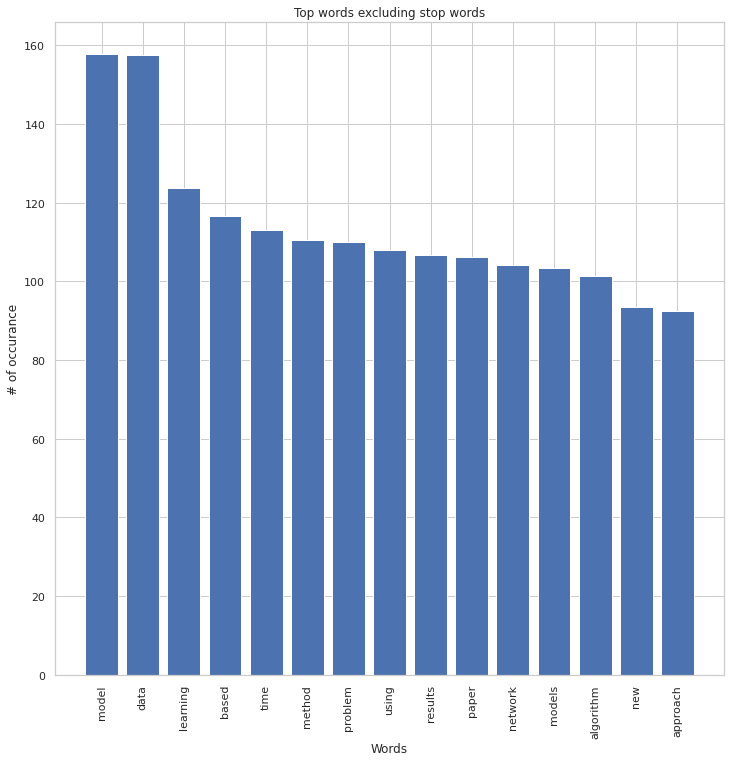

In [80]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(figsize=(12,12)) # this is needed when you are using axis.bar
ax.bar(words,words_val) 
ax.set_xticklabels(words, rotation='vertical') # makes the word vertical
plt.title('Top words excluding stop words',fontsize = 12)
plt.ylabel('# of occurance',fontsize = 12)
plt.xlabel('Words',fontsize=12)
plt.show()

# step 5: Topic Modelling

### Preprocessing Data - lemmatization

* [what does the min/max document frequency exactly means](https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer)

* [use build analyzer](https://stackoverflow.com/questions/36182502/add-stemming-support-to-countvectorizer-sklearn)

add lemmatize support to CountVectorizer (sklearn)

In [81]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [82]:
# import these modules
from nltk.stem import WordNetLemmatizer
  
lemmatizer = nltk.WordNetLemmatizer()
class CountVectorizer_lemmatizer(CountVectorizer):
  def build_analyzer(self):
    analyzer = super(CountVectorizer_lemmatizer, self).build_analyzer()
    return lambda doc:(lemmatizer.lemmatize(w) for w in analyzer(doc))


In [83]:
# train_text is  df_train['ABSTRACT']. all the characters from abstract.
# train_text
# print(list(train_text))
text = list(train_text)
# print(text)
# igonre a term that apperas in more than 95% of the document and ignore a term that appers in less than 2 document
tf_vectorizer = CountVectorizer_lemmatizer(decode_error='ignore', max_df = 0.95,min_df=2,stop_words='english') # applying count vectorizer
# print(tf_vectorizer)
tf = tf_vectorizer.fit_transform(text)
# print(tf)


#  Latent Dirichlet Allocation

[LSA Topic Modelling](https://gist.github.com/susanli2016/3f88f5aab3f844cc53a44817386d06ce)

* **Fit ()**

call fit() to train the model using the input training and data.

[fit() vs predict() vs fit_predict() in Python scikit-learn](https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f)


In a nutshell: fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a .predict() method call.

[What does the “fit” method in scikit-learn do?](https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do)

LatentDirichletAllocation

[sklearn.decomposition.LatentDirichletAllocation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

[How to interpret LDA components (using sklearn)](https://stackoverflow.com/questions/35140117/how-to-interpret-lda-components-using-sklearn)

In [84]:
# play around with this
n_topics = 10

In [85]:
lda = LatentDirichletAllocation(n_components = n_topics, max_iter=5, learning_method='online',learning_offset=50., random_state=0)

lda.fit(tf)

# making LDA TOP MATRIX USING CORPUS TF
lda_topic_modelling = lda.fit_transform(tf)

In [86]:
lda_topic_modelling

array([[5.58676962e-04, 5.58775291e-04, 4.66799517e-02, ...,
        5.58701095e-04, 2.19046296e-01, 3.94864169e-02],
       [2.22246883e-03, 2.22285985e-03, 4.69877758e-01, ...,
        2.22448182e-03, 2.99481687e-01, 2.22296526e-03],
       [1.92309257e-03, 6.89229070e-01, 1.92332416e-03, ...,
        1.92322155e-03, 2.95385512e-01, 1.92319686e-03],
       ...,
       [9.26006316e-04, 5.27832965e-02, 7.99253118e-02, ...,
        9.25979368e-04, 9.26100887e-04, 9.26166377e-04],
       [1.60900649e-02, 9.24097221e-02, 8.69623081e-04, ...,
        4.32471203e-02, 7.02479000e-01, 8.69701095e-04],
       [1.33365703e-03, 1.33359950e-03, 1.33343830e-03, ...,
        1.33350546e-03, 1.28475234e-01, 1.33351898e-03]])

### return an integer list of predicted topic catergories for a given topic matrix

* [numpy.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

In [87]:
def get_keys(topic_matrix):
  # print(topic_matrix.argmax(axis = 1)) # axis = 1, will return maximum index in that array 
  keys = topic_matrix.argmax(axis = 1).tolist()
  print("length of the keys is: ",len(keys))
  return keys

### Return a tuple of topic categories and their accompanying magnitude for a given list of keys

[Counter](https://pymotw.com/2/collections/counter.html)

In [88]:
from collections import Counter
def key_to_count(keys):
  count_pairs = Counter(keys).items()
  # print("Count_pairs",count_pairs)
  categories = [pair[0] for pair in count_pairs]
  # print("categories",categories)
  counts = [pair[1] for pair in count_pairs]
  # print("Counts: ",counts)
  return (categories, counts)

### **Getting category and count from LDA Model**

In [89]:
lda_keys = get_keys(lda_topic_modelling)
print("keys: ",lda_keys)
# key_to_count(lda_keys)

lda_categories, lda_count = key_to_count(lda_keys)


length of the keys is:  20972
keys:  [5, 2, 1, 1, 5, 7, 6, 9, 9, 5, 0, 9, 9, 1, 9, 1, 6, 1, 5, 9, 9, 9, 8, 3, 1, 1, 8, 1, 8, 1, 2, 1, 5, 5, 2, 8, 8, 5, 6, 5, 8, 8, 9, 8, 5, 5, 1, 9, 5, 5, 5, 1, 3, 5, 1, 5, 9, 5, 5, 1, 5, 8, 9, 9, 9, 5, 1, 1, 5, 1, 8, 9, 4, 1, 9, 8, 5, 9, 1, 9, 5, 5, 0, 7, 5, 9, 9, 7, 9, 8, 6, 9, 5, 9, 9, 5, 2, 1, 1, 9, 5, 8, 5, 9, 1, 9, 1, 5, 5, 5, 9, 5, 1, 9, 5, 3, 5, 5, 5, 8, 5, 5, 6, 9, 2, 9, 0, 8, 1, 3, 5, 9, 1, 1, 5, 6, 9, 9, 5, 5, 5, 9, 1, 1, 1, 9, 1, 1, 3, 6, 5, 1, 1, 1, 1, 9, 1, 5, 8, 8, 5, 9, 1, 1, 8, 1, 6, 5, 5, 1, 3, 5, 8, 0, 5, 5, 5, 2, 5, 0, 9, 9, 1, 1, 5, 9, 5, 1, 5, 9, 9, 3, 2, 5, 1, 5, 5, 5, 9, 1, 9, 1, 5, 5, 5, 6, 1, 1, 9, 1, 5, 5, 7, 5, 8, 6, 5, 9, 1, 5, 2, 6, 5, 8, 5, 1, 6, 8, 3, 5, 9, 8, 1, 1, 0, 3, 9, 5, 9, 9, 9, 1, 9, 8, 9, 5, 5, 8, 1, 5, 1, 5, 3, 5, 5, 2, 8, 5, 8, 5, 5, 5, 9, 8, 8, 1, 5, 9, 1, 5, 8, 5, 1, 5, 3, 1, 5, 8, 5, 5, 8, 9, 1, 1, 8, 8, 2, 1, 9, 9, 5, 9, 9, 5, 1, 9, 1, 5, 5, 9, 5, 3, 8, 1, 9, 5, 5, 8, 1, 1, 6, 1, 5, 5, 9, 1, 5, 5, 5, 8, 1,

## **Return A list of n_topic strings, where each string contains the n most common words in a predicted category in order.**

[Code to returns a list of n_topic strings, where each string contains the n most common words in a predicted category, in order](https://gist.github.com/susanli2016/3f88f5aab3f844cc53a44817386d06ce)

In [90]:
def get_top_n_words(n, keys, document_term_matrix, cv):
    top_word_indices = []

    for topic in range(n_topics): # go from 0 to 24
        temp_vector_sum = 0
        # print(len(keys))  # 20972
        # print(keys)
        for i in range(len(keys)): # go from 0 to 20971
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        
        
        temp_vector_sum = temp_vector_sum.toarray()
        # print(temp_vector_sum)

        # print(np.sort(temp_vector_sum))
        # print("\n")
        # print(np.argsort(temp_vector_sum))
        # print("\n")
        # print(np.argsort(temp_vector_sum)[0])
        # print("\n")
        # # last 15 col
        # print(np.argsort(temp_vector_sum)[0][-n:]) # from -15 th col to end for row 0
        # print("\n")
        # print(np.flip(np.argsort(temp_vector_sum)[0][-n:],0))
        # print("\n")
        # print("\n")


        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)  

    # print(document_term_matrix)
    # print(document_term_matrix.shape) #(20972, 24648)
    # print(document_term_matrix.shape[1]) #24648
    # print(np.zeros((1,document_term_matrix.shape[1])))
    # create one row with 24648 column
    # print(len(np.zeros((1,document_term_matrix.shape[1]))[0])) #24648

    top_words = []
    for topic in top_word_indices:
        topic_words = []

        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            # print(temp_word_vector)
            
            the_word = cv.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [91]:
n_top_words = 25
top_n_words = get_top_n_words(n_top_words, lda_keys, tf, tf_vectorizer)

**Printing word from each topic**

In [92]:
for i in range(len(top_n_words)):
    print("Topic {}: \n".format(i+1), top_n_words[i]+"\n")

Topic 1: 
 energy power paper model market price cost resource system network based high technology time data result user performance computing design using application approach service present

Topic 2: 
 result problem function space graph paper equation time mathbb set group prove solution case number study theory model class algebra point non algorithm bound property

Topic 3: 
 network training neural learning adversarial deep model image method gan generative result trained data performance task using propose end input based proposed layer speech classification

Topic 4: 
 language paper logic problem program model result based present theory analysis used work algorithm proof code system type semantics software order using article tool set

Topic 5: 
 cell mutation model tumor game gene tree cause time cop pathway dna protein player population effect specie sequence result phylogeny biofilms cluster rate coalition study

Topic 6: 
 model data network method learning based approa

t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data.

[sklearn.manifold.TSNE](https://scikit-learn.org/0.15/modules/generated/sklearn.manifold.TSNE.html)

[numpy.vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)

[numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

In [93]:
# this will take time
from sklearn.manifold import TSNE
tnse_lda_model = TSNE(n_components=2, perplexity=50, early_exaggeration=4.0, learning_rate=100, n_iter=2000, metric='euclidean', init='random', verbose=0, random_state=0)
tnse_lda_vector = tnse_lda_model.fit_transform(lda_topic_modelling)

**# get top 5 words from each topic to use in plot**

In [94]:
k = 3
top_k_words_lda = get_top_n_words(k,lda_keys,tf,tf_vectorizer)
top_k_words_lda

['energy power paper',
 'result problem function',
 'network training neural',
 'language paper logic',
 'cell mutation model',
 'model data network',
 'star galaxy mass',
 'group mathbb mathfrak',
 'method algorithm problem',
 'state model field']

**# returns a list of centroid vectors from each predicted topic category**

In [95]:

def get_mean_topic_vectors(keys, two_dim_vectors):
  mean_topic_vectors = []

  # n_topics = 10
  for i in range(n_topics):
    articles_in_the_topic = []

    for j in range(len(keys)):
      # print(i)
      # print(keys[j])
      if keys[j] == i:
        # print("two_dim_vectors[j]",two_dim_vectors[j])
        articles_in_the_topic.append(two_dim_vectors[j])

    articles_in_the_topic = np.vstack(articles_in_the_topic)
    # print("articles_in_the_topic",articles_in_the_topic)
    mean_article_in_that_topic = np.mean(articles_in_the_topic,axis = 0) # column wise
    # print("mean_article_in_that_topic",mean_article_in_that_topic)
    mean_topic_vectors.append(mean_article_in_that_topic)

  return mean_topic_vectors


**# Getting the mean of the topic vector for the visualization**

In [96]:
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys,tnse_lda_vector)

**Top word from each topic to use in plot**

[Bokeh](https://docs.bokeh.org/en/latest/docs/user_guide/annotations.html)

[Bokeh color_scatter](https://docs.bokeh.org/en/latest/docs/gallery/color_scatter.html)

In [97]:
# Colourmap for the visualization
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f" ])
colormap = colormap[:n_topics]
print(colormap)

['#1f77b4' '#aec7e8' '#ff7f0e' '#ffbb78' '#2ca02c' '#98df8a' '#d62728'
 '#ff9896' '#9467bd' '#c5b0d5']


In [98]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label

from bokeh.io import output_notebook
output_notebook()

# print(lda_mean_topic_vectors)
# print(tnse_lda_vector) # there are 2 column
# print("\n")
# print(tnse_lda_vector[:,0]) # first column
# print("\n")
# print(tnse_lda_vector[:,1]) # second Column
# print("\n")

plot = figure(title="t-SNE clustring of {} LDA topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x = tnse_lda_vector[:,0], y = tnse_lda_vector[:,1], color = colormap[lda_keys])


for i in range(n_topics):
  label = Label(x = lda_mean_topic_vectors[i][0], y = lda_mean_topic_vectors[i][1], text = top_k_words_lda[i], text_color = colormap[i])
  plot.add_layout(label)



show(plot)


# **Assigning Topics to document**

In [99]:
list(train_text)

["  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used with different binary classifiers in a diag

In [100]:
doc_topic = lda.transform(tf)

# check for 20 documents
for n in range(20):
  # print(doc_topic[n])
  topic_most_pr = doc_topic[n].argmax()
  # print(topic_most_pr)
  print("Document #{} - topic: {}\n".format(n,topic_most_pr))
  # this means document 1 belongs to topic 5 which seems to be like Quantitative Biology  

Document #0 - topic: 5

Document #1 - topic: 2

Document #2 - topic: 1

Document #3 - topic: 1

Document #4 - topic: 5

Document #5 - topic: 7

Document #6 - topic: 6

Document #7 - topic: 9

Document #8 - topic: 9

Document #9 - topic: 5

Document #10 - topic: 0

Document #11 - topic: 9

Document #12 - topic: 9

Document #13 - topic: 1

Document #14 - topic: 9

Document #15 - topic: 1

Document #16 - topic: 6

Document #17 - topic: 1

Document #18 - topic: 5

Document #19 - topic: 9



# Advanced Analysis of LDA
Main goal is to find the most relevant articles for each topic so they can be used as the links for further research

In [101]:
# making a dataframe from the document-topic matrix
doc_topic_df = pd.DataFrame(data=doc_topic)
doc_topic_df

,0,1,2,3,4,5,6,7,8,9
0,0.000559,0.000559,0.046680,0.155668,0.020155,0.516730,0.000559,0.000559,0.219046,0.039486
1,0.002222,0.002223,0.469878,0.002223,0.002222,0.215080,0.002223,0.002224,0.299482,0.002223
2,0.001923,0.689229,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.295386,0.001923
3,0.001588,0.571966,0.001588,0.001588,0.001587,0.001588,0.001588,0.001587,0.230501,0.186420
4,0.001235,0.001235,0.112500,0.001235,0.011195,0.525566,0.163221,0.015370,0.167209,0.001235
...,...,...,...,...,...,...,...,...,...,...
20967,0.000855,0.024481,0.142635,0.100983,0.000855,0.695277,0.000855,0.000855,0.000855,0.032350
20968,0.039384,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.013319,0.037031,0.902948
20969,0.000926,0.052783,0.079925,0.013801,0.070857,0.742548,0.036381,0.000926,0.000926,0.000926
20970,0.016090,0.092410,0.000870,0.000870,0.010376,0.094989,0.037799,0.043247,0.702479,0.000870


# printing the top 'n' articles for each topic

In [102]:
for (columnName, columnData) in doc_topic_df.iteritems():
  print(columnName, columnData)

0 0        0.000559
1        0.002222
2        0.001923
3        0.001588
4        0.001235
           ...   
20967    0.000855
20968    0.039384
20969    0.000926
20970    0.016090
20971    0.001334
Name: 0, Length: 20972, dtype: float64
1 0        0.000559
1        0.002223
2        0.689229
3        0.571966
4        0.001235
           ...   
20967    0.024481
20968    0.001220
20969    0.052783
20970    0.092410
20971    0.001334
Name: 1, Length: 20972, dtype: float64
2 0        0.046680
1        0.469878
2        0.001923
3        0.001588
4        0.112500
           ...   
20967    0.142635
20968    0.001220
20969    0.079925
20970    0.000870
20971    0.001333
Name: 2, Length: 20972, dtype: float64
3 0        0.155668
1        0.002223
2        0.001923
3        0.001588
4        0.001235
           ...   
20967    0.100983
20968    0.001220
20969    0.013801
20970    0.000870
20971    0.365578
Name: 3, Length: 20972, dtype: float64
4 0        0.020155
1        0.002222
2     

In [103]:
for (columnName, columnData) in doc_topic_df.iteritems():
  print(columnData.values) # first column, second column and so on.
  print("\n")
  print(pd.DataFrame(data=columnData.values).sort_values(by=0, ascending=False)) # sort row wise. in descending order

[0.00055868 0.00222247 0.00192309 ... 0.00092601 0.01609006 0.00133366]


              0
10332  0.685034
82     0.674025
2931   0.659645
11745  0.635322
1301   0.627058
...         ...
9306   0.000510
16504  0.000500
15946  0.000498
10061  0.000474
19445  0.000431

[20972 rows x 1 columns]
[5.58775291e-04 2.22285985e-03 6.89229070e-01 ... 5.27832965e-02
 9.24097221e-02 1.33359950e-03]


              0
347    0.992856
1697   0.991088
4577   0.990999
4677   0.989653
1228   0.989155
...         ...
17596  0.000529
11905  0.000526
10608  0.000526
10033  0.000521
11528  0.000516

[20972 rows x 1 columns]
[0.04667995 0.46987776 0.00192332 ... 0.07992531 0.00086962 0.00133344]


              0
30     0.845870
407    0.664686
17317  0.643276
13324  0.641816
4328   0.608954
...         ...
16504  0.000500
15946  0.000498
10061  0.000474
11502  0.000474
19445  0.000431

[20972 rows x 1 columns]
[0.15566757 0.00222255 0.0019232  ... 0.01380118 0.0008697  0.36557811]


              0
3271   0.

In [104]:
for (columnName, columnData) in doc_topic_df.iteritems():
    n = 5
    print('Topic #', columnName)
    sorted_topic = pd.DataFrame(data=columnData.values).sort_values(by=0, ascending=False)
    sorted_topic.columns = [columnName]
    print(sorted_topic[:n])
    
    # store IDs and titles of top articles in a dataframe
    ids = sorted_topic[:n].index
    print("\n")

Topic # 0
              0
10332  0.685034
82     0.674025
2931   0.659645
11745  0.635322
1301   0.627058


Topic # 1
             1
347   0.992856
1697  0.991088
4577  0.990999
4677  0.989653
1228  0.989155


Topic # 2
              2
30     0.845870
407    0.664686
17317  0.643276
13324  0.641816
4328   0.608954


Topic # 3
              3
3271   0.935705
5527   0.933750
10675  0.909995
15554  0.899992
7786   0.877689


Topic # 4
             4
1727  0.570473
1786  0.450994
919   0.394047
9402  0.390371
72    0.389014


Topic # 5
              5
11744  0.993232
15477  0.993180
4767   0.992240
3248   0.991508
1739   0.991508


Topic # 6
              6
6763   0.983332
2592   0.953883
12385  0.953553
4988   0.951272
166    0.943749


Topic # 7
              7
14521  0.935710
5846   0.929970
1847   0.924990
17621  0.887473
13271  0.778042


Topic # 8
              8
12075  0.981630
13820  0.960414
10278  0.953807
392    0.932229
214    0.906696


Topic # 9
             9
1743  0.994117


5    7861
1    4880
9    3639
8    2369
6    1183
3     459
0     235
7     180
2     148
4      18
dtype: int64

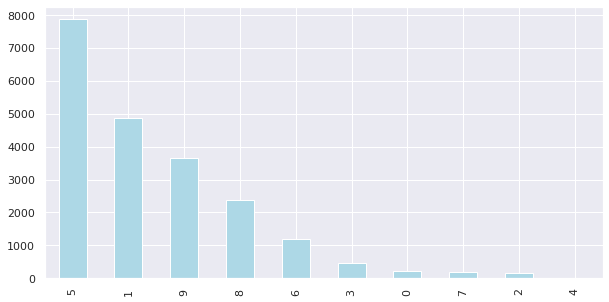

In [105]:
#plotting the distribution of documents over each topic
sns.set(rc={'figure.figsize':(10,5)})
doc_topic_df.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

#store the distributions in a dataframe
distribution = doc_topic_df.idxmax(axis=1).value_counts()
distribution


Reference: https://www.kaggle.com/rababazeem/topic-modeling-lda